# **<u> Aprendizaje Automático  </u>**

In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/Student_performance_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


## **<u> Regresión (Predecir un número cuantitativo - entero / continuo) </u>**

In [289]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor


In [290]:
def compare_models(model_dict):
    results = []

    for name, (mse, r2, pred) in model_dict.items():
        stats = [name, mse, r2, pred]
        results.append(stats)
    # df_results = pd.DataFrame(results, columns=['Modelo', 'Error Cuadrático Medio (MSE)', 'Coeficiente de Determinación (R^2)', 'Predicciones'])
    df_results = pd.DataFrame(results, columns=['Modelo', 'MSE', 'R2', 'Predicciones'])
    return df_results

def gen_graph(x, y_pred, x_name, y_name, title):
    plt.figure(figsize=(14,7))

    sns.scatterplot(data=df, x=x_name, y=y_name)
    plt.plot(x, y_pred, color='red', label='Recta de regresión')
    plt.title(title)
    plt.savefig('./graph/' + title + '.png')


### Regresion Lineal

In [291]:

# Función de regresión lineal
def regresion_lineal(x, y, x_n, y_n):
    # Crear un modelo de regresión lineal
    model = LinearRegression()

    # Ajustar el modelo a los datos
    model.fit(x, y)

    # Hacer predicciones para todos los valores de X
    y_pred = model.predict(x)

    # Calcular métricas
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    # Generar gráfico
    gen_graph(x, y_pred, x_n, y_n, 'Modelo de regresión lineal para predecir los resultados')
    return mse, r2, y_pred

### Regresión Polinómica

In [292]:
def regresion_polinomica(x, y, x_n, y_n):
    # Crear características polinómicas
    poly = PolynomialFeatures(degree=10)  # Cambiar degree para ajustar la complejidad del modelo
    x_poly = poly.fit_transform(x)

    # Crear el modelo de regresión polinómica
    poly_model = LinearRegression()

    # Ajustar el modelo a los datos
    poly_model.fit(x_poly, y)

    # Hacer predicciones
    y_poly_pred = poly_model.predict(x_poly)

    # Evaluar el modelo
    mse_poly = mean_squared_error(y, y_poly_pred)
    r2_poly = r2_score(y, y_poly_pred)

    gen_graph(x, y_poly_pred, x_n, y_n, 'Modelo de regresión polinómica para predecir los resultados')
    return mse_poly, r2_poly, y_poly_pred

### Regresión Ridge

In [293]:
def regresion_ridge(x, y, x_n, y_n):
    # Crear el modelo de regresión Ridge
    ridge_model = Ridge(alpha=1.0)  # Puedes ajustar alpha para regularización

    # Ajustar el modelo a los datos
    ridge_model.fit(x, y)

    # Hacer predicciones
    y_ridge_pred = ridge_model.predict(x)

    # Evaluar el modelo
    mse_ridge = mean_squared_error(y, y_ridge_pred)
    r2_ridge = r2_score(y, y_ridge_pred)

    gen_graph(x, y_ridge_pred, x_n, y_n, 'Modelo de regresión Ridge para predecir los resultados')
    return mse_ridge, r2_ridge, y_ridge_pred

### Regresion de Lasso

In [294]:
def regresion_lasso(x, y, x_n, y_n):
    # Crear el modelo de regresión Lasso
    lasso_model = Lasso(alpha=0.1)  # Puedes ajustar alpha para regularización

    # Ajustar el modelo a los datos
    lasso_model.fit(x, y)

    # Hacer predicciones
    y_lasso_pred = lasso_model.predict(x)

    # Evaluar el modelo
    mse_lasso = mean_squared_error(y, y_lasso_pred)
    r2_lasso = r2_score(y, y_lasso_pred)

    gen_graph(x, y_lasso_pred, x_n, y_n, 'Modelo de regresión Lasso para predecir los resultados')
    return mse_lasso, r2_lasso, y_lasso_pred

### Regresión KNN

In [295]:

def regresion_knn(x, y, x_n, y_n):
    # Crear el modelo de regresión KNN
    knn_model = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar n_neighbors

    # Ajustar el modelo a los datos
    knn_model.fit(x, y)

    # Hacer predicciones
    y_knn_pred = knn_model.predict(x)

    # Evaluar el modelo
    mse_knn = mean_squared_error(y, y_knn_pred)
    r2_knn = r2_score(y, y_knn_pred)

    gen_graph(x, y_knn_pred, x_n, y_n, 'Modelo de regresión KNN para predecir los resultados')
    return mse_knn, r2_knn, y_knn_pred

### Regresión con Árbol de Decisión

In [296]:

def decision_tree_regressor(x, y, x_n, y_n):
    # Crear el modelo de regresión con árbol de decisión
    tree_model = DecisionTreeRegressor(max_depth=5)  # Puedes ajustar max_depth

    # Ajustar el modelo a los datos
    tree_model.fit(x, y)

    # Hacer predicciones
    y_tree_pred = tree_model.predict(x)

    # Evaluar el modelo
    mse_tree = mean_squared_error(y, y_tree_pred)
    r2_tree = r2_score(y, y_tree_pred)

    gen_graph(x, y_tree_pred, x_n, y_n, 'Modelo de regresión con Árbol de Decisión para predecir los resultados')
    return mse_tree, r2_tree, y_tree_pred

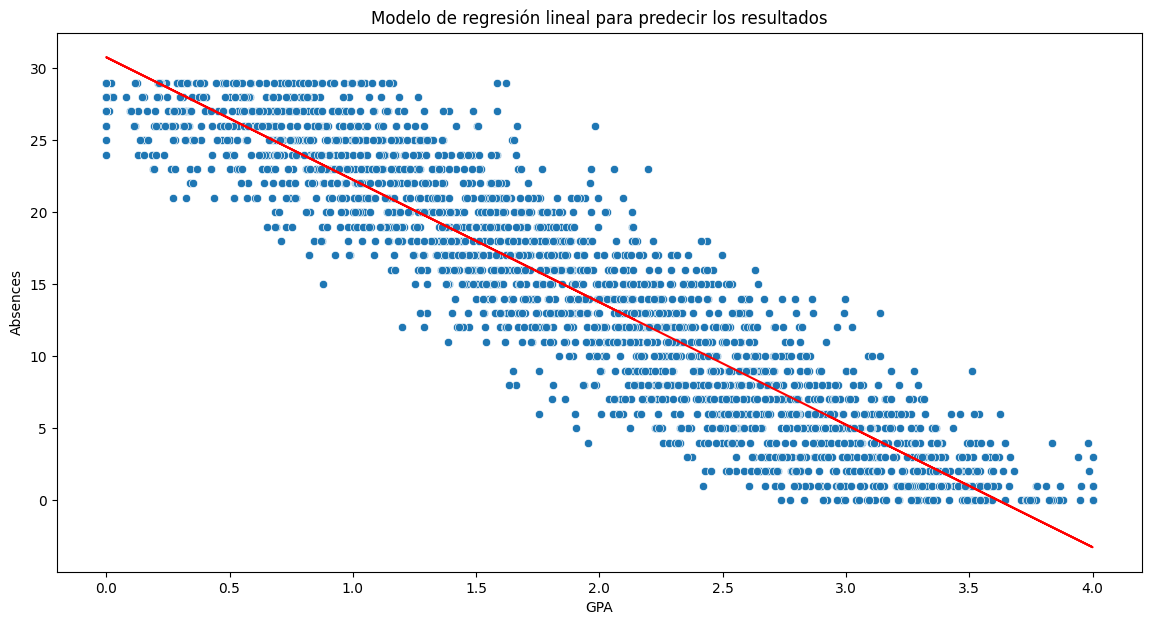

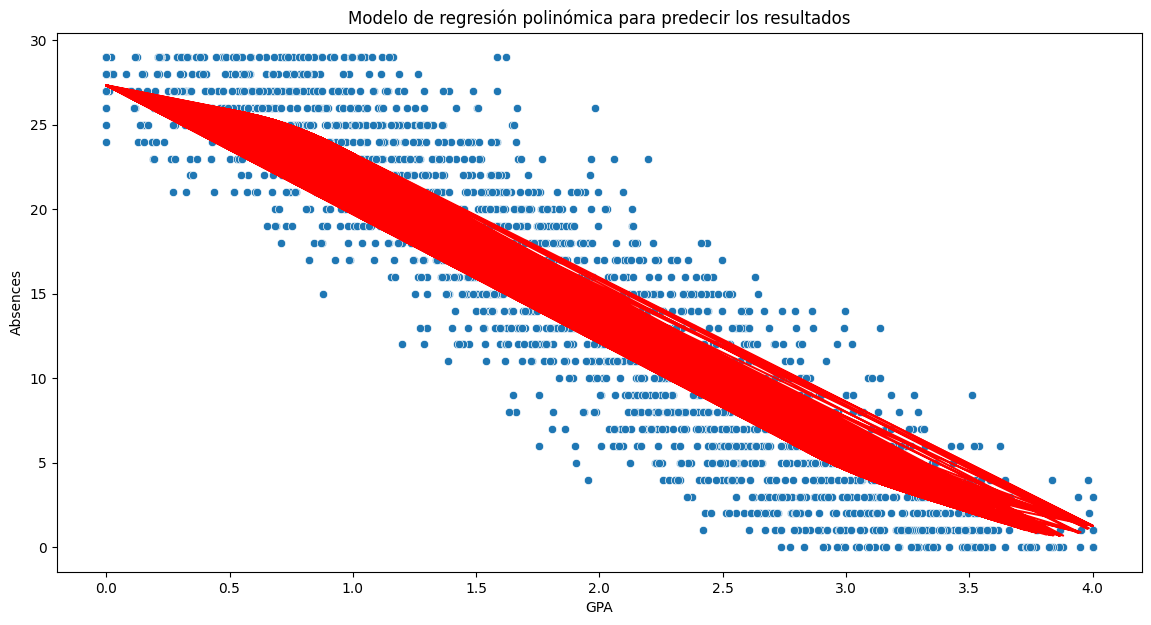

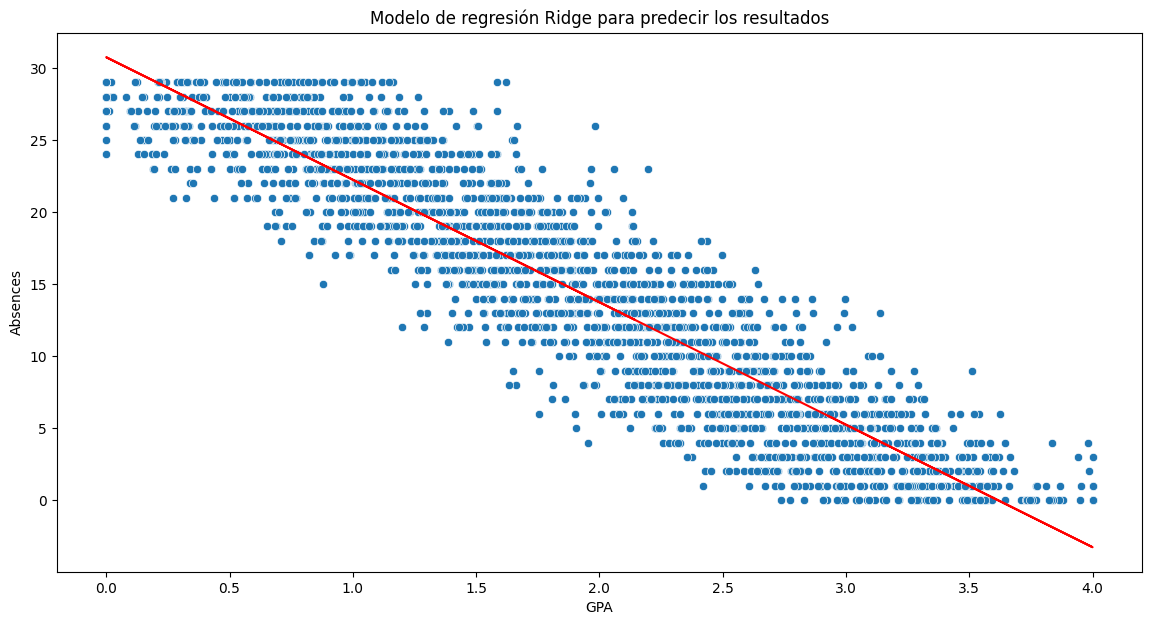

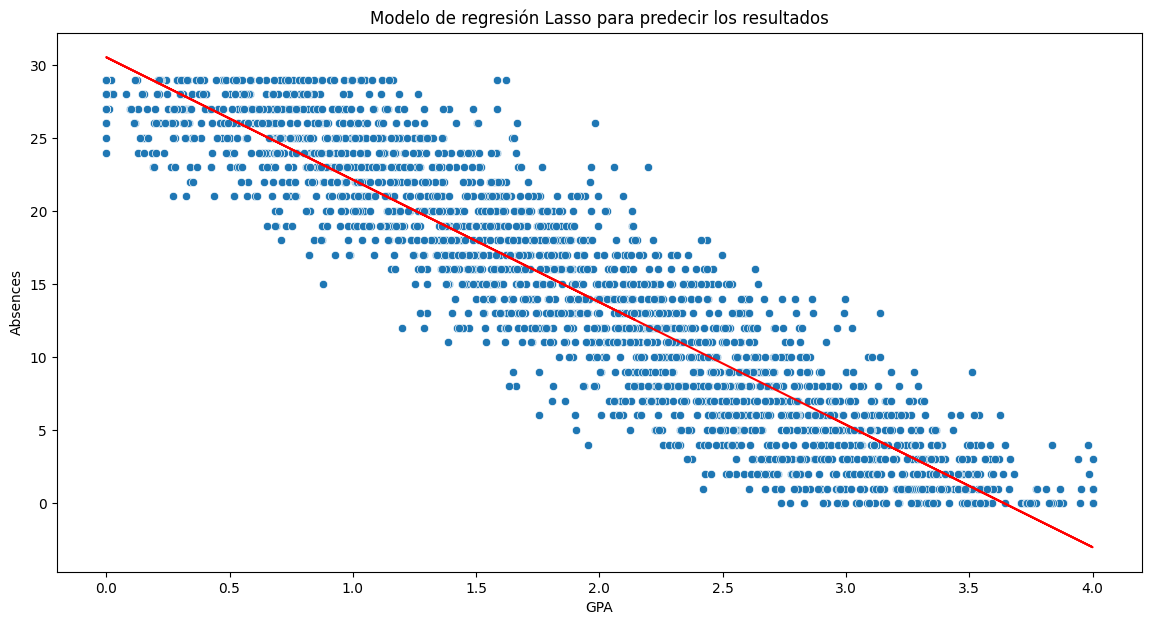

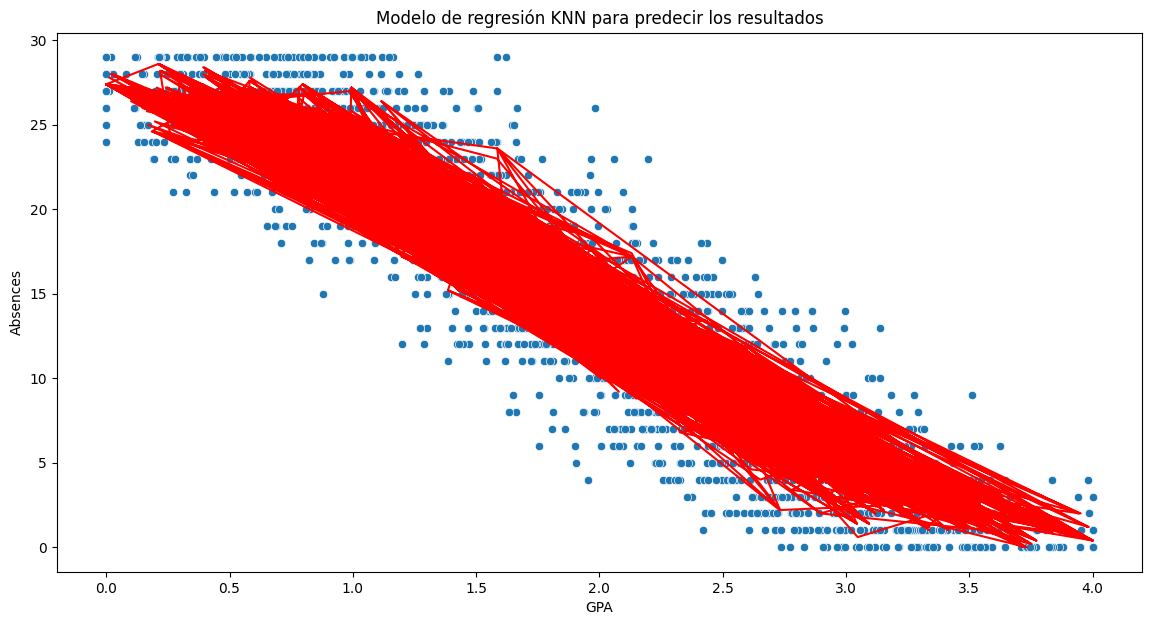

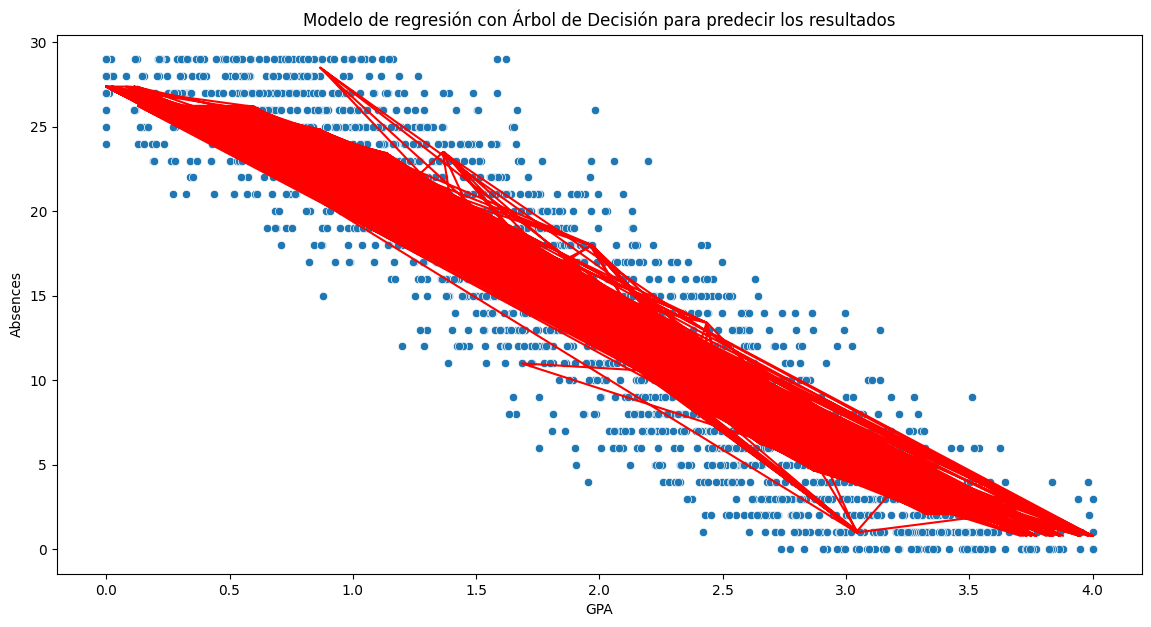

In [297]:
x_n = 'GPA'
y_n = 'Absences'

x = pd.Series(df[x_n])
y = pd.Series(df[y_n])


# Asegurar que x tenga dos dimensiones (n_samples, n_features)
x = x.values.reshape(-1, 1)

# Asegurar que y tenga dos dimensiones (n_samples, 1)
y = y.values.reshape(-1, 1)

models = {'Regresión Lineal': regresion_lineal(x, y, x_n, y_n),
              'Regresión Polinomica': regresion_polinomica(x, y, x_n, y_n),
              'Regresión Ridge': regresion_ridge(x, y, x_n, y_n),
              'Regresión Lasso': regresion_lasso(x, y, x_n, y_n),
              'Regresión KNN': regresion_knn(x, y, x_n, y_n),
              'Árbol de Decisión': decision_tree_regressor(x, y, x_n, y_n),
}

comparison = compare_models(models)

In [298]:
comparison

,Modelo,MSE,R2,Predicciones
0,Regresión Lineal,11.098563,0.845137,"[[5.839786817022009], [4.8725038266963985], [2..."
1,Regresión Polinomica,10.214574,0.857472,"[[5.024355534271436], [4.29797107359386], [26...."
2,Regresión Ridge,11.098578,0.845137,"[[5.844130045544631], [4.877329854993921], [29..."
3,Regresión Lasso,11.110508,0.844971,"[5.961986782735899, 5.008287723265433, 29.5831..."
4,Regresión KNN,8.126923,0.886602,"[[5.4], [1.4], [26.8], [11.2], [18.8], [4.0], ..."
5,Árbol de Decisión,9.754562,0.863891,"[4.647619047619048, 1.0, 27.379310344827587, 1..."


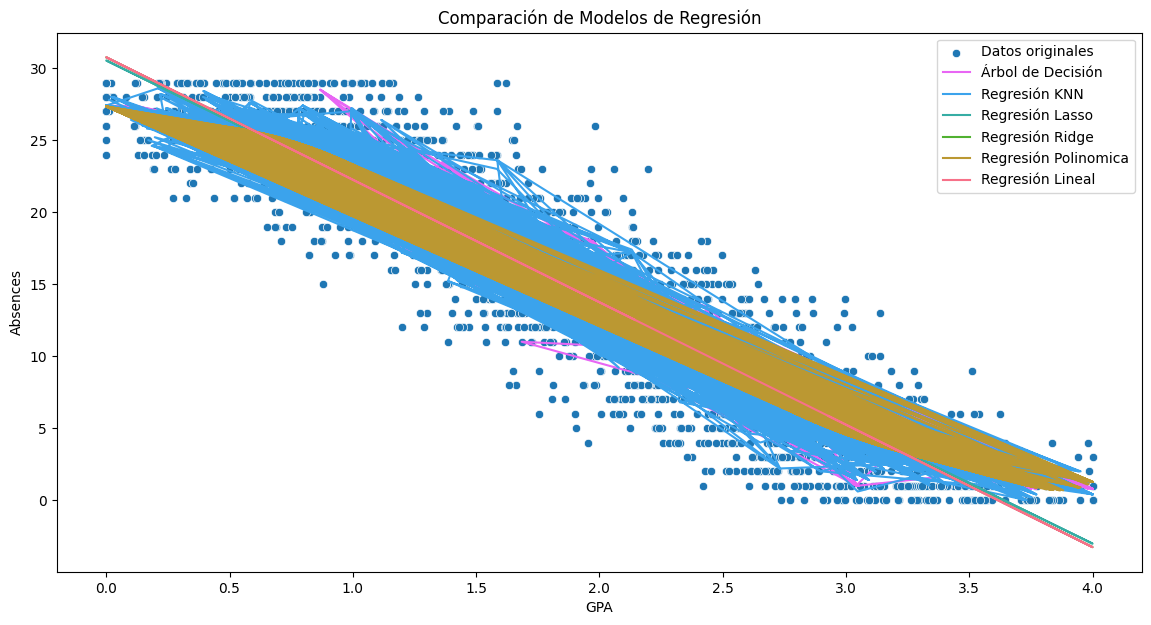

In [299]:
import random

# Cargar una paleta de colores de seaborn
palette = sns.color_palette("husl", n_colors=len(comparison))

def get_color(index):
    return palette[index]

comparison = comparison.iloc[::-1]

plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x=x_n,  y=y_n, label='Datos originales')

# Agregar las predicciones de cada modelo
for index, row in comparison.iterrows():
    Modelo = row['Modelo']
    mse = row['MSE']
    r2 = row['R2']
    y_pred = row['Predicciones']
    # plt.plot(x, y_pred, color=random_color(), label=f'{Modelo} (MSE: {mse:.2f}, R2: {r2:.2f})')
    plt.plot(x, y_pred, color=get_color(index), label=f'{Modelo}')


plt.title('Comparación de Modelos de Regresión')
plt.xlabel('GPA')
plt.ylabel('Absences')
plt.legend()
plt.savefig('./graph/Comparacion_de_Modelos_de_Regression.png')
plt.show()

## **<u> Clasificación (Predecir una clase - binaria / multinomial) </u>**

In [300]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [301]:
def compare_models_class(model_dict):
    results = []
    confusion_matrices = {}

    for name, (confusion, exactitud, precision, sensibilidad, f1) in model_dict.items():
        stats = [name, exactitud, precision, sensibilidad, f1]
        results.append(stats)
        confusion_matrices[name] = confusion    

    df_results = pd.DataFrame(results, columns=['Modelo', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
    return df_results, confusion_matrices

def gen_graph_class(df_metricas):

    fig, ax = plt.subplots(2, 2, figsize=(14, 10))

    sns.barplot(x='Modelo', y='Accuracy', data=df_metricas, ax=ax[0, 0])
    ax[0, 0].set_title('Exactitud')

    sns.barplot(x='Modelo', y='Precision', data=df_metricas, ax=ax[0, 1])
    ax[0, 1].set_title('Precision')

    sns.barplot(x='Modelo', y='Recall', data=df_metricas, ax=ax[1, 0])
    ax[1, 0].set_title('Recall')

    sns.barplot(x='Modelo', y='F1 Score', data=df_metricas, ax=ax[1, 1])
    ax[1, 1].set_title('F1 Score')

    plt.tight_layout()
    plt.savefig('./graph/Modelos de Clasificacion.png')
    plt.show()

def gen_confusion_matrix(confusion_matrices):
    for model_name, confusion in confusion_matrices.items():
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Matriz de Confusión - {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.savefig(f'./graph/Matriz de Confusión - {model_name}.png')
        plt.show()

In [302]:
def regresión_logistica(X_train, X_test, y_train, y_test):
    modelo = LogisticRegression()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [303]:
def arbol_decision(X_train, X_test, y_train, y_test):
    modelo = DecisionTreeClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [304]:
def random_forest(X_train, X_test, y_train, y_test):
    modelo = RandomForestClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [305]:
def maquina_vectores_soporte(X_train, X_test, y_train, y_test):
    modelo = SVC()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [306]:
def k_nearest(X_train, X_test, y_train, y_test):
    modelo = KNeighborsClassifier()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

In [307]:
def naive_bayes(X_train, X_test, y_train, y_test):
    modelo = GaussianNB()
    modelo.fit(X_train, y_train)  # Entrenar el modelo
    y_pred = modelo.predict(X_test)  # Hacer predicciones
    confusion = confusion_matrix(y_test, y_pred)
    exactitud = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    sensibilidad = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return confusion, exactitud, precision, sensibilidad, f1

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


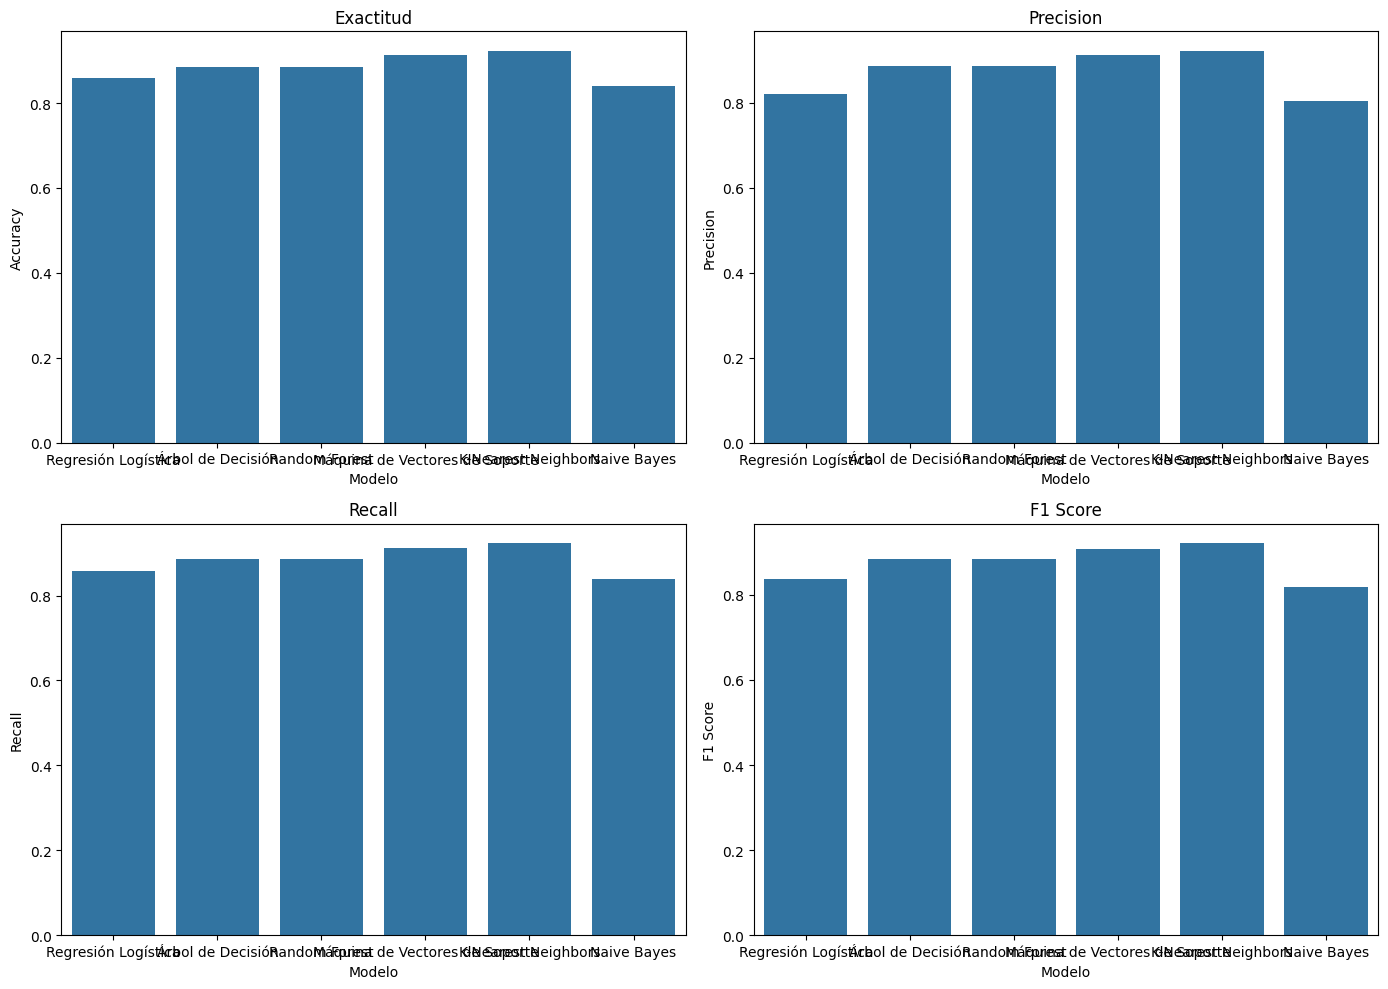

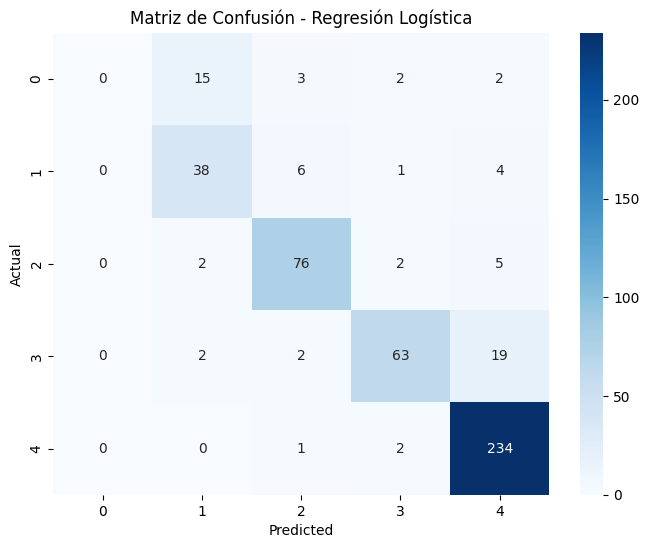

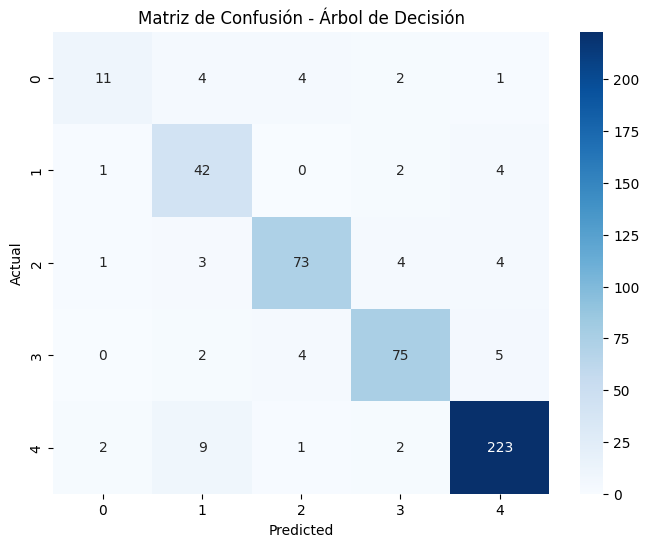

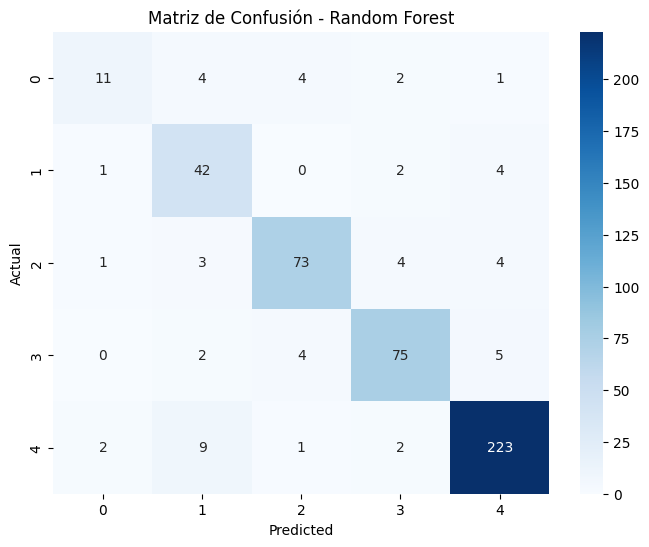

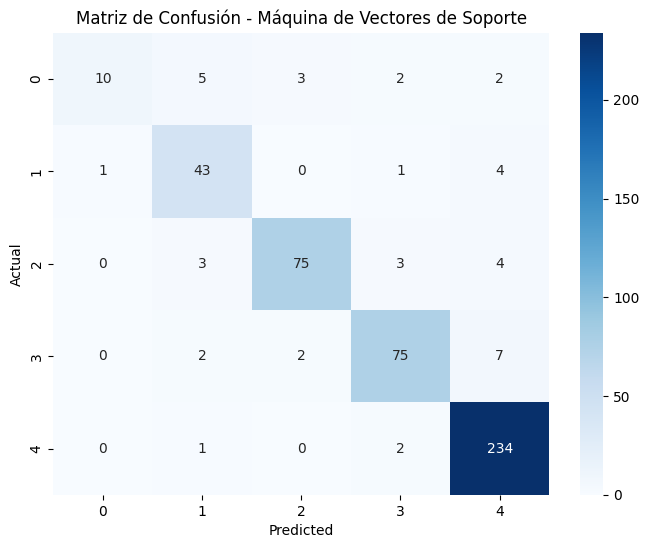

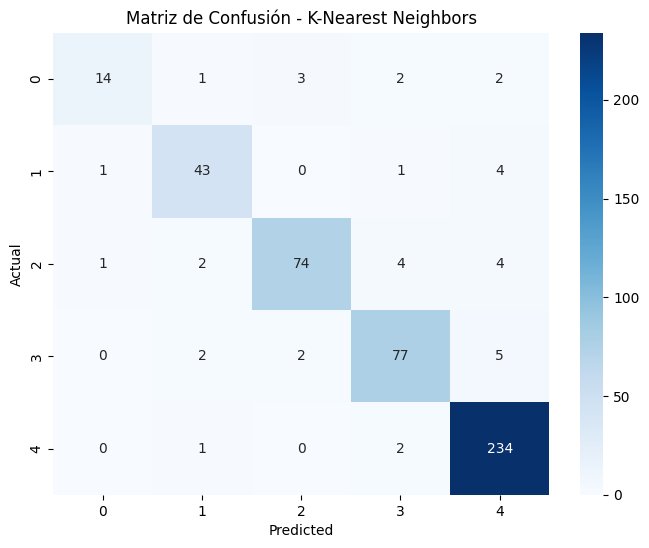

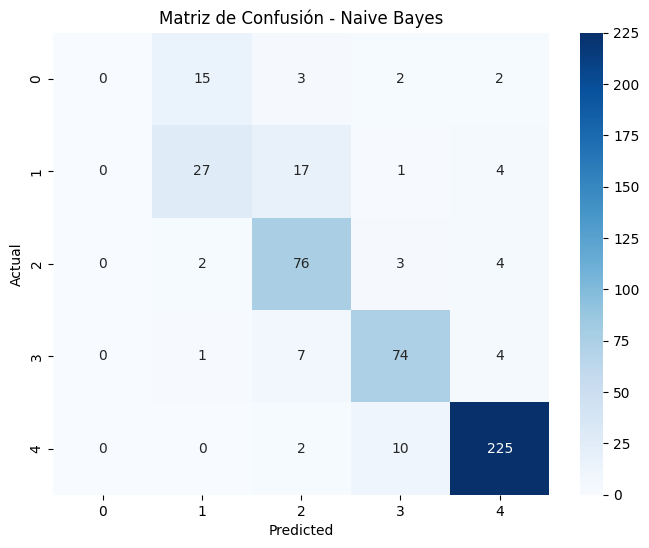

,Modelo,Accuracy,Precision,Recall,F1 Score
0,Regresión Logística,0.858038,0.821595,0.858038,0.836461
1,Árbol de Decisión,0.885177,0.887237,0.885177,0.884327
2,Random Forest,0.885177,0.887237,0.885177,0.884327
3,Máquina de Vectores de Soporte,0.912317,0.913079,0.912317,0.908428
4,K-Nearest Neighbors,0.922756,0.921906,0.922756,0.920960
5,Naive Bayes,0.839248,0.803240,0.839248,0.819461


In [308]:
x_n = 'ParentalEducation'
y_n = 'GradeClass'

X = df[[x_n]].values
y = df[y_n].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Regresión Logística': regresión_logistica(X_train, X_test, y_train, y_test),
    'Árbol de Decisión': arbol_decision(X_train, X_test, y_train, y_test),
    'Random Forest': random_forest(X_train, X_test, y_train, y_test),
    'Máquina de Vectores de Soporte': maquina_vectores_soporte(X_train, X_test, y_train, y_test),
    'K-Nearest Neighbors': k_nearest(X_train, X_test, y_train, y_test),
    'Naive Bayes': naive_bayes(X_train, X_test, y_train, y_test)
}

comparison, confusion_matrices = compare_models_class(models)
gen_graph_class(comparison)
gen_confusion_matrix(confusion_matrices)
comparison